### Quiz 3. tips 데이터에서 팁을 많이 받으려면 어떤 데이터가 중요한지 인사이트를 찾아내세요
- 정답은 없습니다. 자유롭게 분석해보세요. 
- size는 식사 인원인것 같네요.
- 아래의 절차대로 Pandas를 이용하여 데이터를 분석해 보세요. (예시는 예시일 뿐입니다.)
    - 가설설정 : 예) 주중보다 주말에 팁을 많이 줄것이다
    - 분석과정설정 : 예) 주중 데이터와 주말데이터를 나눠 평균적 팁 금액의 데이터 프레임을 만든다.
    - 결과확인 : 예) 주말과 주중데이터의 평균 팁에는 큰 차이가 없으므로 가설이 틀렸다. 그러므로 다시 가설설정!
- 위의 가설을 여러개 세우셔서 어떤 데이터가 가장 팁에 대한 데이터에 영향을 많이 주는지 찾아보세요. (최소한 3개이상의 가설을 세워서 분석해보세요.)
- 지금까지 배운내용안에서 분석해보세요.
- 가설, 분석과정, 결과 확인에 대한 설명 주석을 달아주세요.
- 적당한 그래프를 그려주시면 더 좋습니다.
- 반별로 제가 판단해서 가장 잘하신 과제는 다른 분들께 공유하며 제가 스타벅스 커피 삽니다.^^

In [1]:
tips = sns.load_dataset("tips") 
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## 1. 데이터 분포도 확인

### 1.1 데이터 분포 확인

#### 1.1.1실수형 데이터 분포

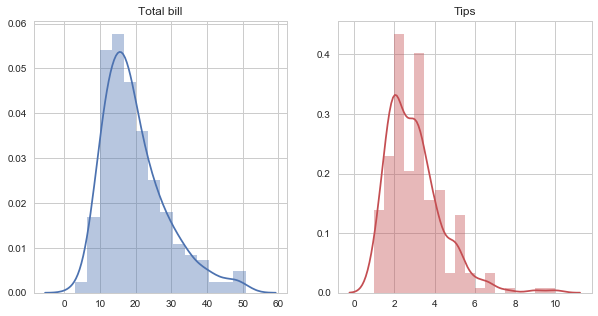

In [2]:
total_bill_data = tips.total_bill.values
tips_data = tips.tip.values

f, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].set(title = "Total bill")
axes[1].set(title = "Tips")
sns.distplot(total_bill_data, ax = axes[0])
sns.distplot(tips_data, color = 'r', ax = axes[1])

plt.show()

In [3]:
pd.Series(total_bill_data).describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
dtype: float64

In [4]:
pd.Series(tips_data).describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
dtype: float64

#### 1.1.2 카테고리형 데이터 분포

In [5]:
sex_data = tips.sex.values.value_counts()
smoker_data = tips.smoker.values.value_counts()
day_data = tips.day.values.value_counts()
time_data = tips.time.values.value_counts()
size_data = tips["size"].value_counts(sort=False)

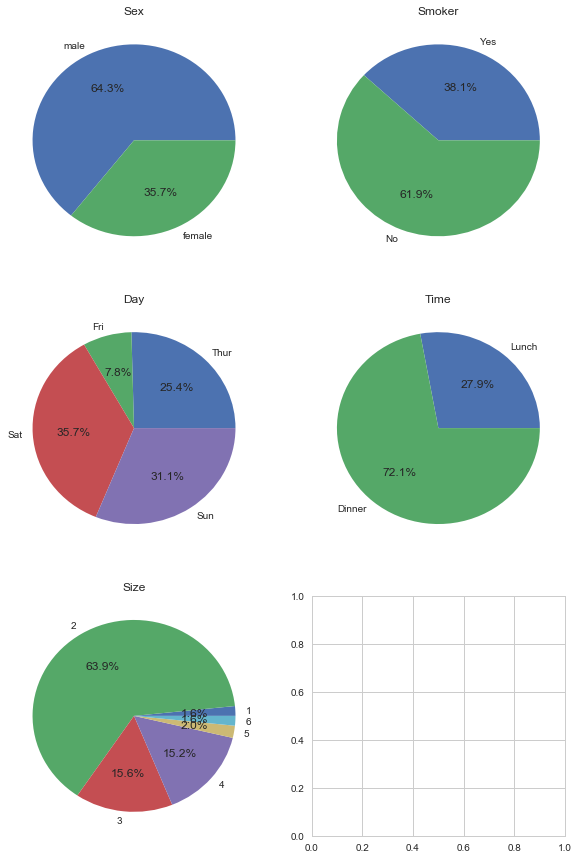

In [6]:
f1, axes1 = plt.subplots(3, 2, figsize = (10, 15))

axes1[0,0].set_title("Sex")
axes1[0,1].set_title("Smoker")
axes1[1,0].set_title("Day")
axes1[1,1].set_title("Time")
axes1[2,0].set_title("Size")

axes1[0,0].pie(sex_data, labels = ["male", "female"], autopct = "%1.1f%%")
axes1[0,1].pie(smoker_data, labels = ["Yes", "No"], autopct = "%1.1f%%")
axes1[1,0].pie(day_data, labels = ["Thur", "Fri", "Sat", "Sun"], autopct = "%1.1f%%")
axes1[1,1].pie(time_data, labels = ["Lunch", "Dinner"], autopct = "%1.1f%%")
axes1[2,0].pie(size_data, labels = [1, 2, 3, 4, 5, 6], autopct = "%1.1f%%")

plt.show()

#### 1.1.3 카테고리 데이터 간 분포도 확인

### 1. 2 각 항목별 tip과의 상관관계 확인

#### 1.2.1 실수형 데이터와 tip간의 상관 관계 확인

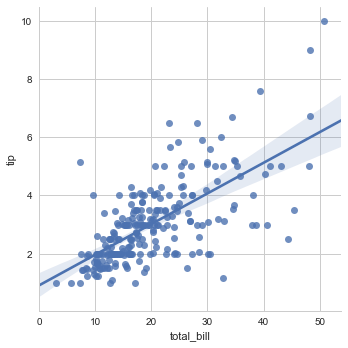

In [7]:
ax = sns.lmplot(x = "total_bill", y= "tip", data = tips)

In [8]:
A = np.array([total_bill_data]).T
b = np.array([tips_data]).T
x, resid, rank, s = np.linalg.lstsq(A, b)
print("가중치 : {}".format(round(x[0][0], 2)))

가중치 : 0.14


**total_bill이 1달라씩 오를 때마다 tips가 0.14달라씩 오른다.**

#### 1.2.2 카테고리형 데이터와 tip간의 상관 관계 확인

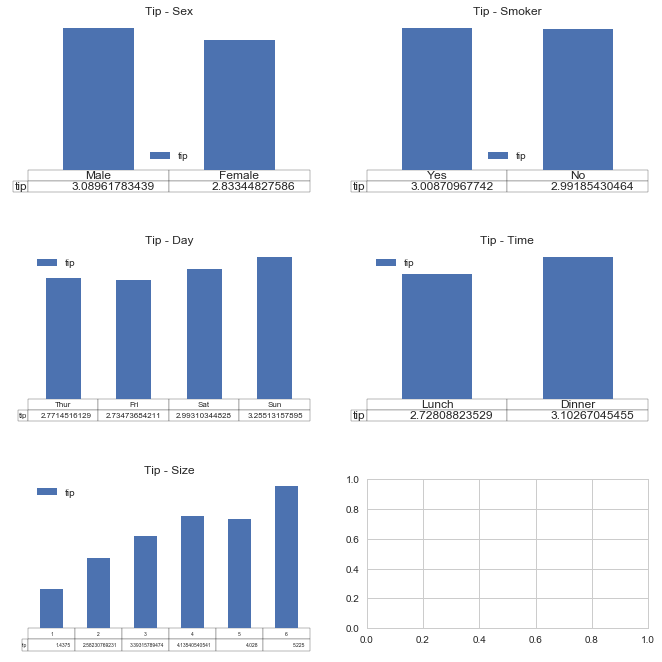

In [9]:
df_sex = pd.DataFrame(tips.groupby(["sex"])["tip"].mean())
df_smoker = pd.DataFrame(tips.groupby(["smoker"])["tip"].mean())
df_day = pd.DataFrame(tips.groupby(["day"])["tip"].mean())
df_time = pd.DataFrame(tips.groupby(["time"])["tip"].mean())
df_size = pd.DataFrame(tips.groupby(["size"])["tip"].mean())


f3, axes3 = plt.subplots(3, 2, figsize=(10, 10))
df_sex.plot(kind = 'bar', title = 'Tip - Sex', ax = axes3[0, 0], table = True)
df_smoker.plot(kind = 'bar',title = 'Tip - Smoker', ax = axes3[0, 1], table = True)
df_day.plot(kind = 'bar',title = 'Tip - Day', ax = axes3[1, 0], table = True)
df_time.plot(kind = 'bar',title = 'Tip - Time', ax = axes3[1, 1], table = True)
df_size.plot(kind = 'bar', title = 'Tip - Size', ax = axes3[2, 0], table = True)

axes3[0, 0].set_axis_off()
axes3[0, 1].set_axis_off()
axes3[1, 0].set_axis_off()
axes3[1, 1].set_axis_off()
axes3[2, 0].set_axis_off()

plt.tight_layout(pad=3, h_pad=1)
plt.show()

## 2. 가설 설정

### 2.1. 커플이 식당을 찾을 때, 남녀 둘중에 누가 더 팁을 많이 주는 가?

위에 1.1.2 번의 그래프 분포도를 보면, size 속성에서 64%가 2명이고, time 속성에서는 74%가 Dinner, day 속성에서는 66.8%가 주말이다. 이 정보만 가지고 해석해 보면, '주말 저녁에 2명이서 오븐한 시간을 보내기 위해서 레스토랑을 찾는다.' 라고 말할 수 있다. 이렇게 해석해보면 자연스레 '위 식당은 커플이 많이 찾는다.' 라는 가설을 세울 수 있게 된다. 

그러므로2명이 왔을 때 남녀의 둘중에 누가 더 팁을 많이 주는 지 확인해 본다.  

### 2.2 부자들은 더 팁을 많이 주는가?

몇몇은 '부자들이 더 짠돌이다.' 라는 말을 한다. 실제로 이 말이 진실인지 알아보기로 한다.

실제로 부자인지 아닌지는 이 데이터를 가지고 판단하기 어렵다. 그렇기 때문에 1인당 bill (total_bill/size)의 10%를 부자라고 가정하겠다. 이렇게 한 이유는 돈이 많을수록 비싼 음식을 살수 있을 거라고 판단했기 때문이다.(예외적으로 대식가이여서 인당 bill이 높을 수도 있다.)

이 1인당 bill 데이터를 가지고 부자들이 더 팁을 많이 주는가에 대해서 분석해 보기로 한다.

### 3.3 월요병이 오기 전에 사람은 더 관대하게 팁을 주는 가?

  우리는 일요일 저녁마다 월요일이 오기를 두려워한다. 월요일 상사의 호통, 반복적인 업무, 지루한 회의 속으로 들어가기 매우 싫다. 두려운 월요일을 마주하기 전에 우리는 어떤 소비 패턴을 보여 줄 것인가? 

  tips 데이터는 이런 궁금증을 해결하기에 매우 알맞은 데이터이다. 왜냐하면 day의 66.8%가 주말이며, time의 72.1%가 Dinner로 자신의 귀한 주말 저녁의 즐거움을 만족시키기는 휴일의 즐거움을 아는 사람들만 오는 곳이기 때문이다. 휴일의 즐거움을 제대로 즐기러 온 사람일수록 월요병의 휴우증은 더 크게 다가올거라 나는 생각한다. 
  
  그러므로 일요일 저녁 데이터를 분석하여 월요병이 팁에 미치는 영향에 대해서 알아보다.

## 3. 가설 판단

### 3.1 식당은 주로 커플이 많이 찾는가? 커플이 많이 찾을 때, 남녀 둘중에 누가 더 팁을 많이 주는 가?

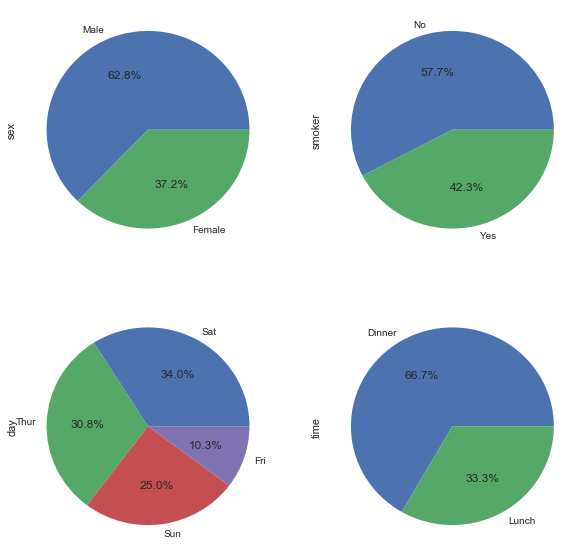

In [110]:
# 커플이 자주 오는 건지에 대한 증거
## size가 2인일 때의 "smoker", "day", "time", "sex" 분포도 확인
f4, axes4 = plt.subplots(2, 2, figsize = (10, 10))

tips[tips["size"]==2]["sex"].value_counts().plot.pie(ax = axes4[0, 0], autopct = "%1.1f%%")
tips[tips["size"]==2]["smoker"].value_counts().plot.pie(ax = axes4[0, 1], autopct = "%1.1f%%")
tips[tips["size"]==2]["day"].value_counts().plot.pie(ax = axes4[1, 0], autopct = "%1.1f%%")
tips[tips["size"]==2]["time"].value_counts().plot.pie(ax = axes4[1, 1], autopct = "%1.1f%%")

sex
Male      2.614184
Female    2.528448
Name: tip, dtype: float64

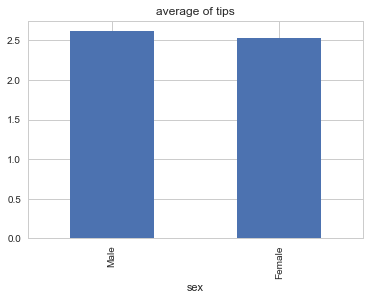

In [118]:
# 2인일 때, 남녀 두명의 팁 평균 계산
df = tips[tips["size"]== 2].groupby(["sex"])["tip"].mean()
df.plot(kind = "bar")
plt.title("average of tips")
df

### 3.2 부자들은 더 팁을 많이 주는가?

count    244.00000
mean       7.88823
std        2.91435
min        2.87500
25%        5.80250
50%        7.25500
75%        9.39000
max       20.27500
Name: billPerOne, dtype: float64

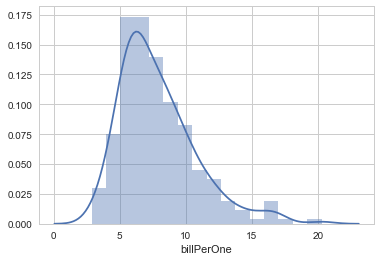

In [23]:
# 1인당 음식값 컬럼 추가
tips["billPerOne"] = tips["total_bill"] / tips["size"]

sns.distplot(tips["billPerOne"])
tips["billPerOne"].describe()

In [82]:
# 1인당 음식값을 25% 단위로 나누어서 (25, 50, 75, 100) 카테고리 값으로 변환
tips["billPerOne"]
tips["bPO_category"] = pd.qcut(tips["billPerOne"], 4, labels = ["100", "75", "50", "25"])
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,billPerOne,bPO_category
239,29.03,5.92,Male,No,Sat,Dinner,3,9.676667,25
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000,25
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000,25
242,17.82,1.75,Male,No,Sat,Dinner,2,8.910000,50
243,18.78,3.00,Female,No,Thur,Dinner,2,9.390000,50


,tip
bPO_category,
100,2.503607
75,2.583607
50,3.225323
25,3.688167


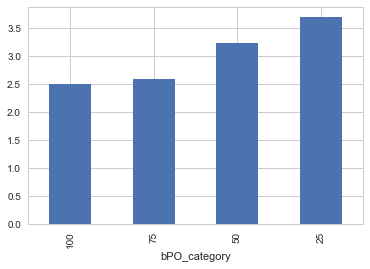

In [45]:
# 각 분포당 팁 평균 계산
pd_bPO_tip_mean = tips.groupby(["bPO_category"])["tip"].mean()
pd_bPO_tip_mean.plot(kind = "bar")
pd.DataFrame(pd_bPO_tip_mean)

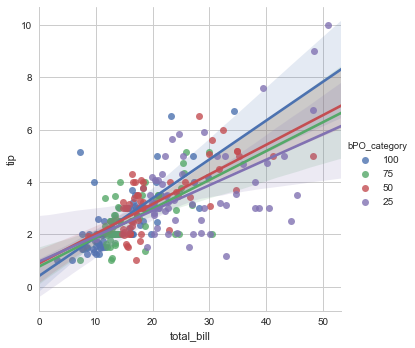

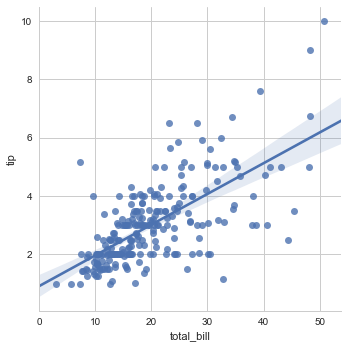

In [89]:
# 각 분포당 상관도 계산
sns.lmplot(x="total_bill", y="tip", data=tips, hue = "bPO_category")
ax = sns.lmplot(x = "total_bill", y= "tip", data = tips)

### 3.3 월요병이 오기 전에 사람은 더 관대하게 팁을 주는 가?

In [68]:
# 일요일 저녁 팁 평균 계산
df_dayTime_bill = tips.pivot_table(values = "tip", index = ["day"], columns = ["time"], aggfunc = np.mean).fillna(value = 0)

day
Thur    3.000000
Fri     2.940000
Sat     2.993103
Sun     3.255132
Name: Dinner, dtype: float64

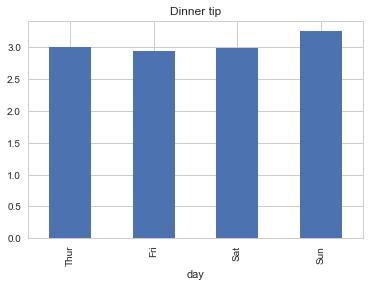

In [71]:
# 목 금 토 저녁 팁 평균 계산 및 비교
df_dayTime_bill["Dinner"].plot(kind = "bar", title = "Dinner tip")
df_dayTime_bill["Dinner"]

## 4. 결과 확인

### 4.1 식당은 주로 커플이 많이 찾는가? 커플이 많이 찾을 때, 남녀 둘중에 누가 더 팁을 많이 주는 가?

- 두명이 식당을 찾았을 때, 남자와 여자의 팁 차이는 0.086으로 별 차이가 나지 않는다.

### 4.2 부자들은 더 팁을 많이 주는가?

- 1인당 음식 지불 값을 기준으로 카테고리를 나누어 보았을 때, 상위 25%에 있는 사람들의 tip 평균이 3.69로 그외의 카테고리의 tip평균보다 높은 값을 가지게 되었다.


- 하지만, lmplot을 이용해서 tip과 total_bill 선형관계를 비교해 보았을 때에는 다른 카테고리에 별차이가 없는 것을 볼 수 있다. 이것을 해석해보면 1인당 음식 지불 값의 높은 사람들이 관대해서 팁을 많이 주는 것이 아니라, 단순히 고급진 비싼 음식을 시켰기 때문에 높은 tip을 주었다고 추측해 볼 수 있다.

### 4.3 월요병이 오기 전에 사람은 더 관대하게 팁을 주는 가?

- 일요일 저녁의 tip 평균은 3.26으로 다른 시간대의 저녁(3.00, 2.94, 2.99)보다 월등이 높은 평균을 보여준다.

- 이 자료를 통해, 월요일의 두려움이 당사자들에게 고통이 될 수 있지만, 서비스를 제공하는 사람들에게 도움이 될 수 있다는 것을 보여준다.